In [3]:
import rpy2.robjects as robjs
import scipy.stats as spt
import numpy as np
import pandas as pd

robjs.r['load']("class1.RData")
S=robjs.r['S']
print(S)

   X1 X2
1   1  1
2   2  1
3   3  1
4   4  1
5   5  1
6   6  1
7   1  2
8   2  2
9   3  2
10  4  2
11  5  2
12  6  2
13  1  3
14  2  3
15  3  3
16  4  3
17  5  3
18  6  3
19  1  4
20  2  4
21  3  4
22  4  4
23  5  4
24  6  4
25  1  5
26  2  5
27  3  5
28  4  5
29  5  5
30  6  5
31  1  6
32  2  6
33  3  6
34  4  6
35  5  6
36  6  6



In [4]:
# 단일 모집단 검정

import rpy2.robjects as robjs

rng = np.random.default_rng()
rvs = spt.norm.rvs(loc=5, scale=10, size=(50, 1), random_state=rng) #평균 5, 표준편차 10
ss=spt.ttest_1samp(rvs, 5.0) # 1 샘플, 5.0은 귀무가설
print(ss)
print(spt.ttest_1samp(rvs, 0.0))

robjs.r['load']("class3.RData")
ex1=robjs.r['exa10_9']

tt=spt.ttest_1samp(ex1,np.mean(ex1))

#t에서 통계량 0.26804796

Ttest_1sampResult(statistic=array([0.26804796]), pvalue=array([0.7897876]))
Ttest_1sampResult(statistic=array([4.31917448]), pvalue=array([7.61521386e-05]))


In [5]:
# 카이제곱 검정 (적합도)

print(spt.chisquare([16, 18, 16, 14, 12, 12]))

print(spt.chisquare([16, 18, 16, 14, 12, 12], f_exp=[16, 16, 16, 16, 16, 8]))

print(spt.chisquare([16, 18, 16, 14, 12, 12], ddof=[0,1,2]))

obs=np.array([31,26,22,18,13,10])
print(spt.chisquare(obs))

# 교차분석

ss=robjs.r['exa12_5']
print(ss)

ch2,pval,df,evl=spt.chi2_contingency(observed=ss)

print('chi2 value is ',ch2,'\np-value is ',pval,'\ndegree of freedom is ',df,'\nexpected values are \n',evl)

Power_divergenceResult(statistic=2.0, pvalue=0.8491450360846096)
Power_divergenceResult(statistic=3.5, pvalue=0.6233876277495822)
Power_divergenceResult(statistic=2.0, pvalue=array([0.84914504, 0.73575888, 0.5724067 ]))
Power_divergenceResult(statistic=15.7, pvalue=0.007754884452437289)
     [,1] [,2] [,3] [,4] [,5]
[1,]   20   16   29   21   14
[2,]   14   22   26   25   13
[3,]   18   24   32   18    8
[4,]    8   18   33   16   25

chi2 value is  21.166666666666668 
p-value is  0.047992500621633336 
degree of freedom is  12 
expected values are 
 [[15. 20. 30. 20. 15.]
 [15. 20. 30. 20. 15.]
 [15. 20. 30. 20. 15.]
 [15. 20. 30. 20. 15.]]


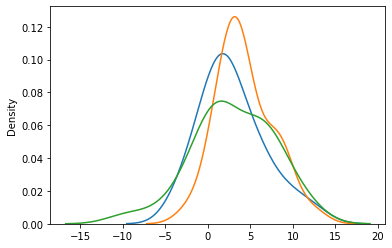

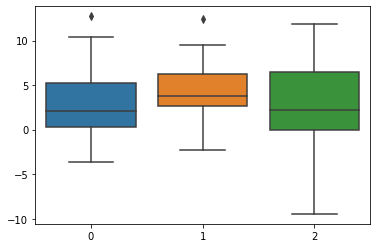

F_onewayResult(statistic=1.171534108991306, pvalue=0.31473131164363166)
F_onewayResult(statistic=78.51047905182283, pvalue=2.852694074293974e-13)


In [8]:
# One way ANOVA

np.random.seed(5)

grp1=np.random.normal(3,4,30)
grp2=np.random.normal(3.1,4.1,30)
grp3=np.random.normal(2.84,4.3,30)

grp=[grp1,grp2,grp3]

import seaborn as sb
import matplotlib.pyplot as plt

sb.kdeplot(grp1)
sb.kdeplot(grp2)
sb.kdeplot(grp3)
plt.show()

sb.boxplot(data=grp)
plt.show()

print(spt.f_oneway(grp1,grp2,grp3))
F_stat,pval=spt.f_oneway(*grp)

ttt=robjs.r['exa13_6']

print(spt.f_oneway(ttt[0],ttt[1],ttt[2]))